In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd



In [6]:

def N(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)**2)/(sigma**2))

def p(x):
    return 0.3*N(x, 2, 1) + 0.5 * N(x, 5, 2) + 0.3 * N(x, 9, 1)




# Question 1

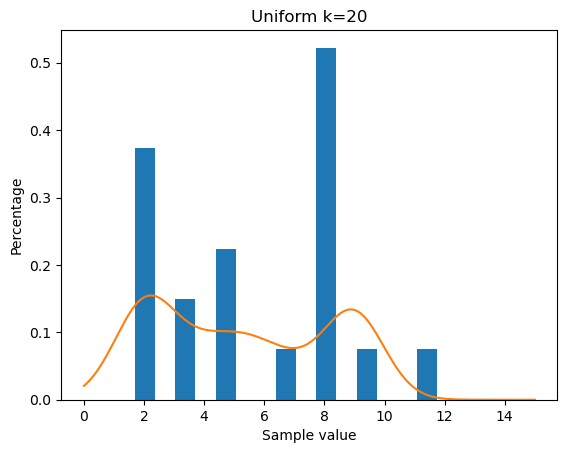

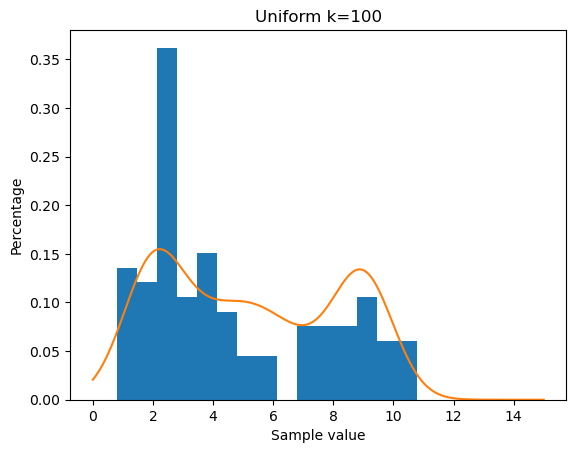

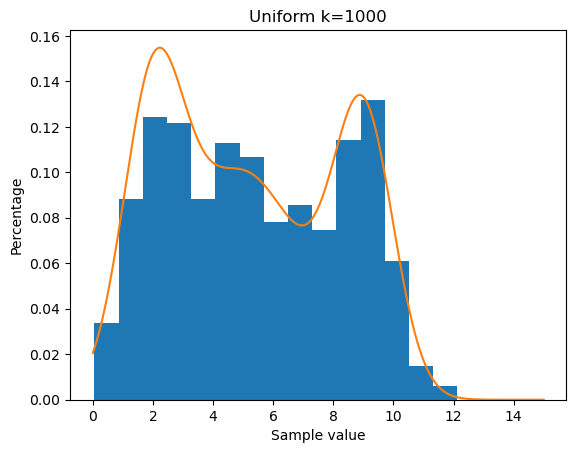

In [7]:


def q_uniform(k):
    lst = []
    for i in range(k):
        x = rnd.uniform(0, 15)
        lst.append(x)

    return lst

def gen_weights(lst):
    y = [p(i) for i in lst]
    return y


def plot_hist(k, y):
    plt.hist(y, bins=15, density=True, stacked=True)

    # Add the true distribution p(x)
    x_p = np.linspace(0, 15, 1000)
    y_p = [p(i) for i in x_p]
    plt.plot(x_p, y_p)
    plt.title(f"Uniform k={k}")
    plt.xlabel("Sample value")
    plt.ylabel("Percentage")

    plt.savefig(f"uniform_k_{k}")
    plt.show()
    
    return y

def SIR(k):
    # Sample from q
    samples = q_uniform(k)
    # Generate weights
    weights = gen_weights(samples)
    # normalize weights
    weights = [i/sum(weights) for i in weights]

    # Resample step
    indicies = np.random.choice(range(k), k, p=weights)
    new_samples = [samples[i] for i in indicies]

    # Plot the resut of the resampling
    plot_hist(k, new_samples)


SIR(20)
SIR(100)
SIR(1000)



# Question 2

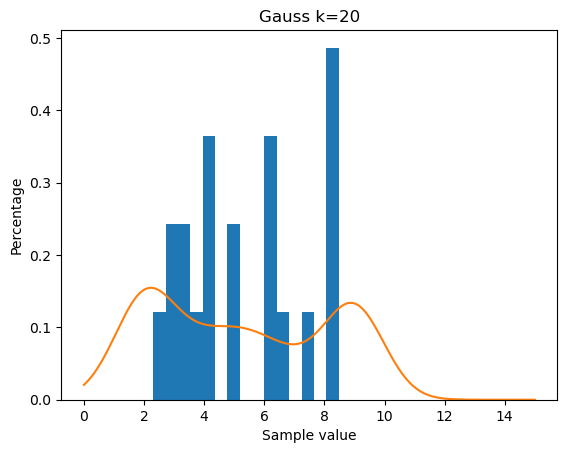

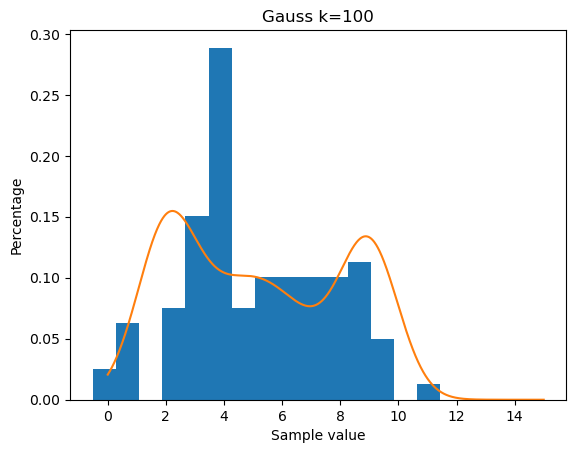

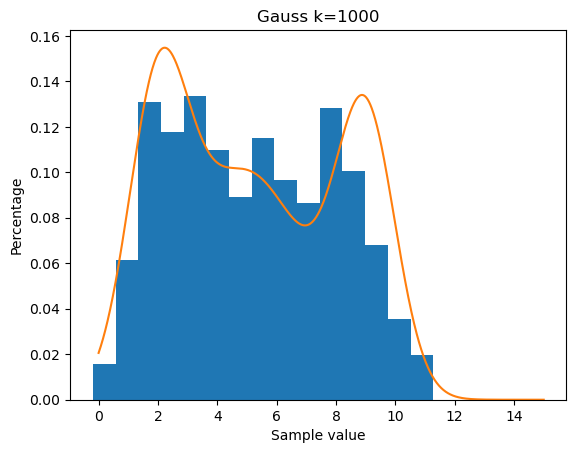

In [8]:
def q_gauss(k):
    lst = []
    for i in range(k):
        x = rnd.gauss(5, 4)
        lst.append(x)

    return lst

def gen_weights(lst):
    y = [p(i) for i in lst]
    return y


def plot_hist(k, y):
    plt.hist(y, bins=15, density=True, stacked=True)

    # Add the true distribution p(x)
    x_p = np.linspace(0, 15, 1000)
    y_p = [p(i) for i in x_p]
    plt.plot(x_p, y_p)
    plt.title(f"Gauss k={k}")
    plt.xlabel("Sample value")
    plt.ylabel("Percentage")

    plt.savefig(f"gauss_k_{k}")
    
    plt.show()
    
    return y

def SIR(k):
    # Sample from q
    samples = q_gauss(k)
    # Generate weights
    weights = gen_weights(samples)
    # normalize weights
    weights = [i/sum(weights) for i in weights]

    # Resample step
    indicies = np.random.choice(range(k), k, p=weights)
    new_samples = [samples[i] for i in indicies]

    # Plot the resut of the resampling
    plot_hist(k, new_samples)


SIR(20)
SIR(100)
SIR(1000)
